porownanie globalne, animcaja od lat ok 60, zrobienie algorytmu ktory sprawdza nagle spadki (srednia rkoczaca czy cos) ktory wyrzuca nagle anomalie (bezwzgl wartosci pkb). potem sprawdzic co wtedy bylo

podzial na zwykjle i percapita

algorytm wykrywajacy anomalie

uwzglednienie podzialu na kategorie kraju

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Wczytanie gpd <br>
bez kolumn indicator name i indicator code informujące o przedstawianiu pkb przy pomocy dolarów  (GDP per capita (current US$)	i NY.GDP.PCAP.CD)<br>
drop 2024 ponieważ są tam same Nan

In [2]:
gdp = pd.read_excel('gdp.xls', sheet_name='Data', skiprows=3)
gdp = gdp.drop(columns=['Indicator Name', 'Indicator Code','2024'])

In [3]:
gdp_per_capita = pd.read_excel('gdp_per_capita.xls', sheet_name='Data', skiprows=3)
gdp_per_capita = gdp_per_capita.drop(columns=['Indicator Name', 'Indicator Code','2024'])

Informacje o tym do jakiej grupy przychodowej zakategoryzowano dane kraje

In [4]:
metadata = pd.read_excel('gdp.xls', sheet_name='Metadata - Countries')
metadata = metadata[['Country Code','IncomeGroup']]

Join metadanych do kolumn 

In [5]:
data = pd.merge(gdp, metadata, on='Country Code', how='left')

In [6]:
data_pc = pd.merge(gdp_per_capita, metadata, on='Country Code', how='left')

https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

In [7]:
world1 = gpd.read_file("shape/ne_110m_admin_0_countries.shp")
world1 = world1[['ADMIN','SOV_A3','geometry']]
world1 = world1.rename(columns={'ADMIN': 'Country Name', 'SOV_A3': 'Country Code'})

"https://github.com/datasets/geo-countries/raw/main/data/countries.geojson"

In [8]:
world2 = gpd.read_file("https://github.com/datasets/geo-countries/raw/main/data/countries.geojson")
world2 = world2[['name','ISO3166-1-Alpha-3','geometry']]
world2 = world2.rename(columns={'name': 'Country Name', 'ISO3166-1-Alpha-3': 'Country Code'})
world2 = world2[world2['Country Code'] != '-99']

Z istotnych krajów Brakuje Francji

https://github.com/georgique/world-geojson/blob/develop/countries/france.json

In [9]:
franceshp = gpd.read_file("shape/france.json")
franceshp = franceshp.dissolve()
franceshp = franceshp.to_crs(world2.crs)
franceshp['Country Code'] = 'FRA'
france_row = franceshp[['Country Code', 'geometry']]
france_row = france_row.reset_index(drop=True)

world2 = pd.concat([world2, france_row], ignore_index=True)


In [10]:
world = pd.concat([world1, world2]).drop_duplicates(subset='Country Code').reset_index(drop=True)
world = world[['Country Code','geometry']]

In [11]:
data = pd.merge(world, data, on='Country Code', how='left')
data_pc = pd.merge(world, data_pc, on='Country Code', how='left')
data

,Country Code,geometry,Country Name,1960,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,IncomeGroup
0,FJI,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,1.123284e+08,1.169878e+08,1.229064e+08,1.294547e+08,1.400327e+08,1.470848e+08,1.506039e+08,...,4.682480e+09,4.930214e+09,5.353469e+09,5.581425e+09,5.444407e+09,4.432466e+09,4.305032e+09,4.969504e+09,5.442047e+09,Upper middle income
1,TZA,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzania,2.651730e+09,2.826179e+09,3.101590e+09,3.456579e+09,3.748841e+09,3.817227e+09,4.377999e+09,...,4.741392e+10,4.977441e+10,5.327488e+10,5.700371e+10,6.102673e+10,6.606874e+10,7.065563e+10,7.576997e+10,7.906240e+10,Lower middle income
2,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,4.056377e+10,4.103819e+10,4.233621e+10,4.514034e+10,4.950366e+10,5.464941e+10,6.125242e+10,...,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.743725e+12,1.655685e+12,2.007472e+12,2.161483e+12,2.142471e+12,High income
4,US1,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,GUM,"POLYGON ((144.8864 13.6402, 144.89666 13.61799...",Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.799000e+09,5.901000e+09,6.013000e+09,6.051000e+09,6.355000e+09,5.916000e+09,6.234000e+09,6.910000e+09,NaN,High income
251,MNP,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...",Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.100000e+08,1.230000e+09,1.560000e+09,1.301000e+09,1.179000e+09,8.660000e+08,9.140000e+08,1.096000e+09,NaN,High income
252,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26...",Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.252330e+10,3.388468e+10,3.720481e+10,3.956798e+10,4.044681e+10,3.583763e+10,4.084021e+10,4.668040e+10,4.607987e+10,High income
253,MAC,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2...","Macao SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.504819e+10,4.507081e+10,5.038387e+10,5.519066e+10,5.508229e+10,2.534353e+10,3.096933e+10,2.499911e+10,4.580307e+10,High income


In [12]:
data_pc

,Country Code,geometry,Country Name,1960,1961,1962,1963,1964,1965,1966,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,IncomeGroup
0,FJI,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,277.431535,280.273367,285.473073,291.383574,305.532203,311.241073,309.574409,...,5097.531088,5363.790256,5826.848141,6085.419792,5950.828686,4844.421290,4696.171019,5405.030074,5888.736686,Upper middle income
1,TZA,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzania,275.296021,285.156799,303.997437,329.010590,346.301819,342.077942,380.497925,...,939.127319,953.010742,986.674011,1023.106262,1063.322510,1117.415283,1159.856567,1207.853027,1224.489624,Lower middle income
2,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,2264.948497,2246.083566,2274.428471,2380.317329,2561.638491,2777.183173,3055.288079,...,43594.194105,42314.061582,45129.628117,46539.176157,46352.869345,43537.839299,52496.844169,55509.393176,53431.185706,High income
4,US1,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,GUM,"POLYGON ((144.8864 13.6402, 144.89666 13.61799...",Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35165.701464,35930.659490,36779.007890,37195.950307,39274.943142,36482.936395,38074.879375,41833.151713,NaN,High income
251,MNP,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...",Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17665.100749,24225.474169,31225.604996,26509.362838,24496.665212,18220.838243,19455.501394,23785.754590,NaN,High income
252,BHR,"MULTIPOLYGON (((50.55161 26.19424, 50.59474 26...",Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23734.055114,23800.001441,24784.769351,26324.406655,27259.743860,24342.844455,27147.808388,30616.261068,29218.860563,High income
253,MAC,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2...","Macao SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70070.291800,69074.036305,77704.921531,83761.817180,81967.699173,36976.256107,45376.314586,36909.956409,67476.529081,High income


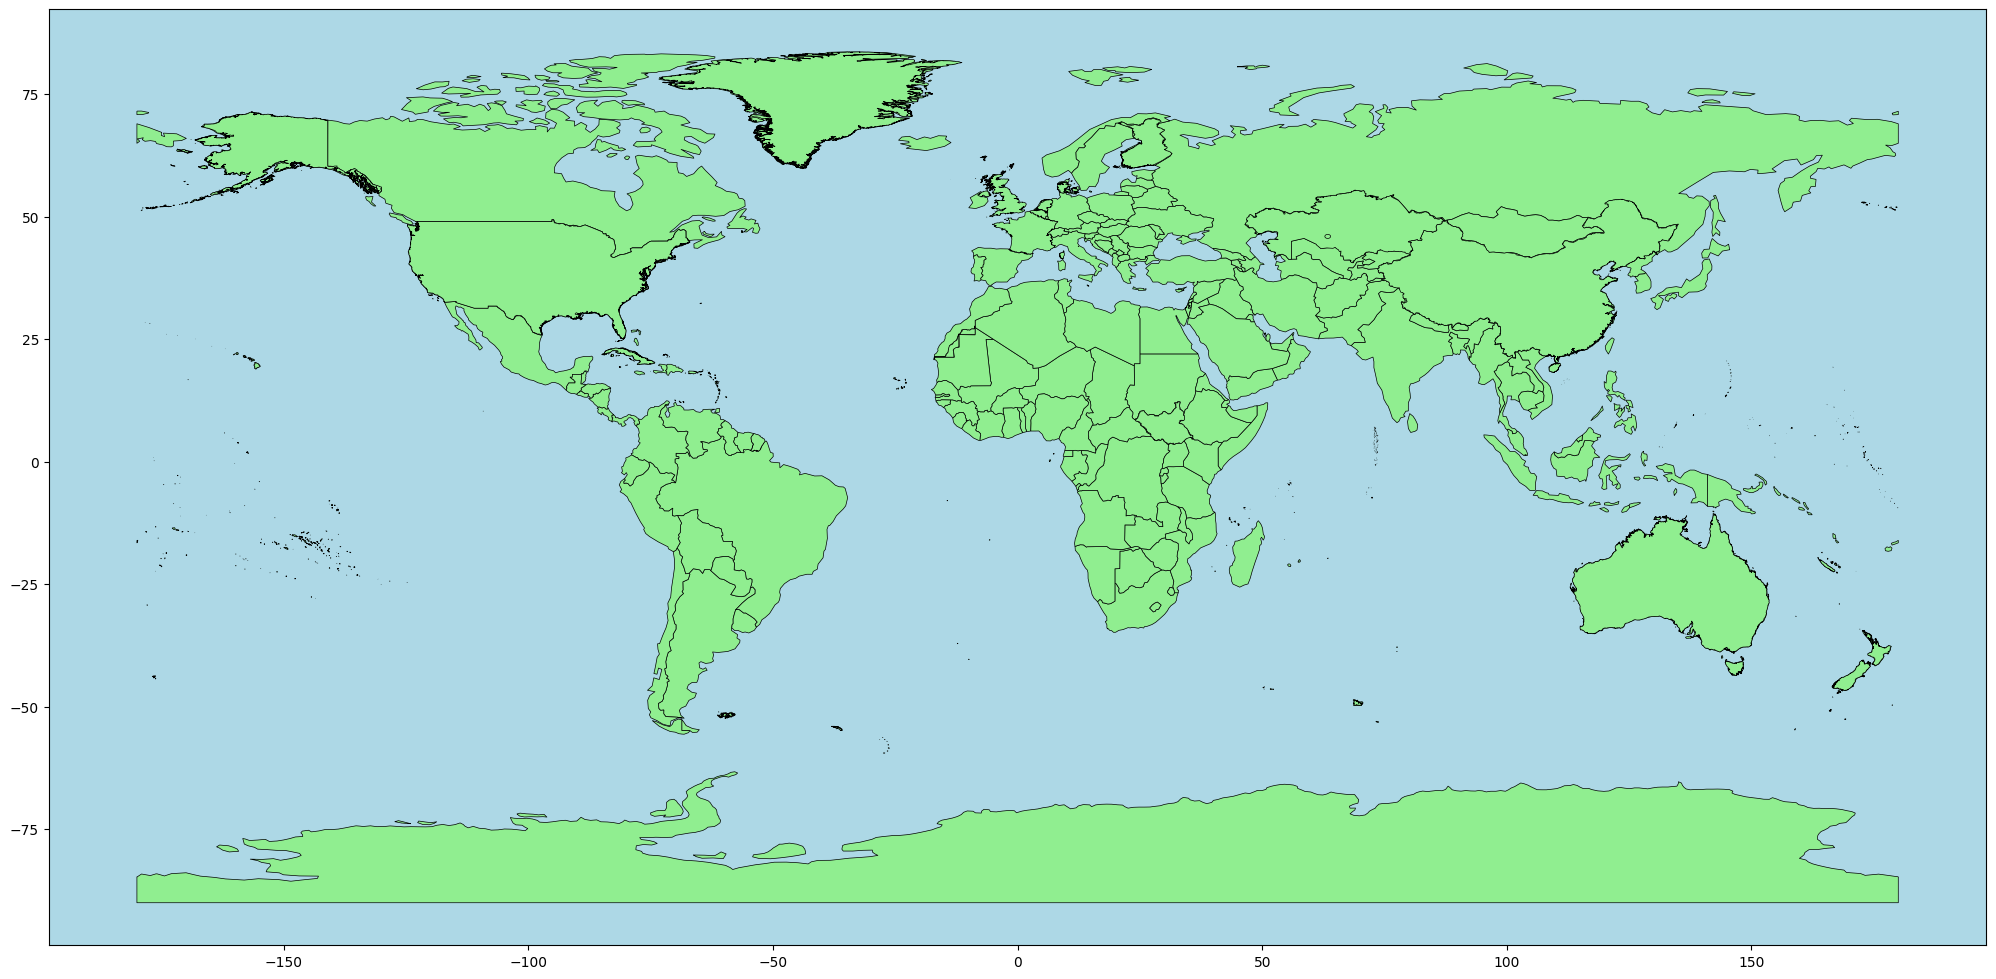

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
data.plot( ax=ax, color='lightgreen',  edgecolor='black', linewidth=0.5)
ax.set_facecolor('lightblue')